In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv("coin_Bitcoin.csv")
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


<AxesSubplot:title={'center':'Bitcoin Closing Price'}, xlabel='Date'>

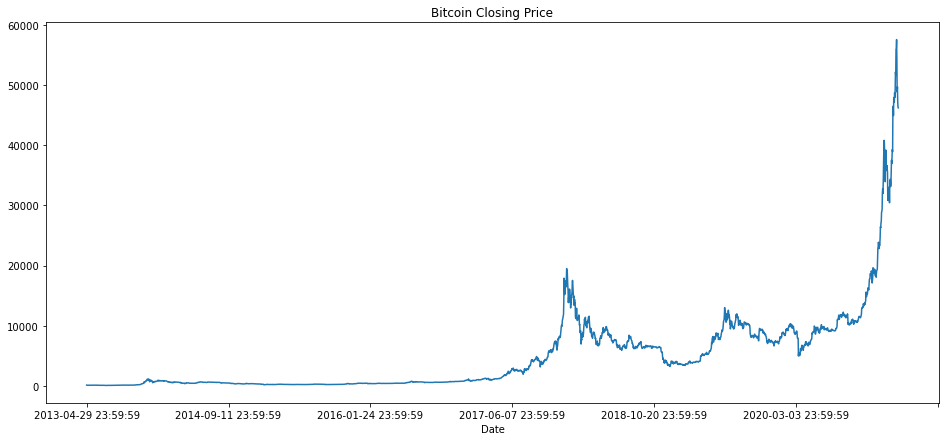

In [64]:
df.set_index("Date").Close.plot(figsize=(16,7), title="Bitcoin Closing Price")

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [66]:
array=df.values

In [68]:
X=array[:,4:]
Y=array[:,7:8]
data_dmatrix = xgb.DMatrix(data=X,label=Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [69]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 1, alpha = 10, n_estimators = 200)

In [70]:

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[01:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [71]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 426.355665


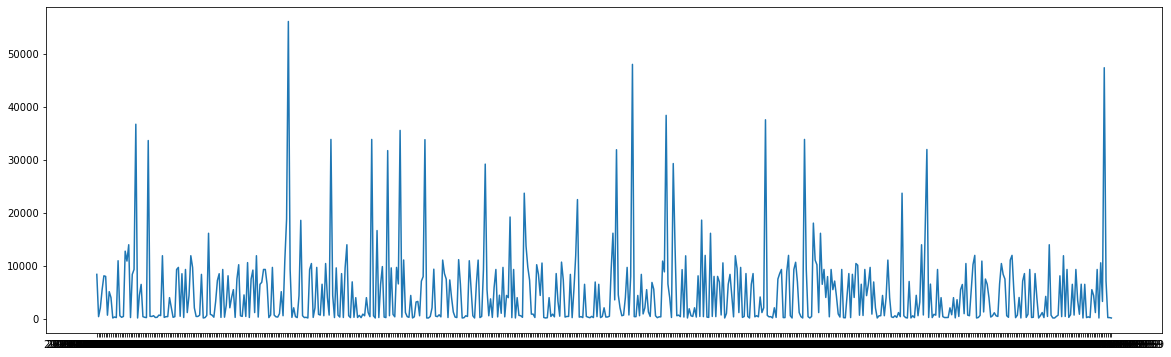

In [72]:
plt.figure(figsize=(20,6))
plt.plot(df['Date'][2289:],preds)

In [82]:
df['Predictions'].iloc[2289:]=pd.DataFrame(preds)
df.tail()

ValueError: Incompatible indexer with DataFrame

<AxesSubplot:title={'center':'Bitcoin Closing Price'}, xlabel='Date'>

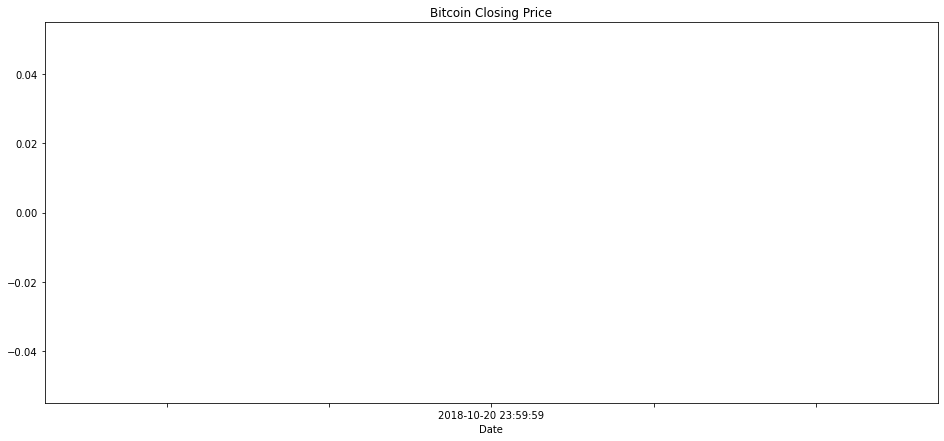

In [79]:
df.set_index("Date")[2000:2289].Predictions.plot(figsize=(16,7), title="Bitcoin Closing Price")